<a href="https://colab.research.google.com/github/cedmasantos/Bootcamp-WomakersCode/blob/master/Estatistica_com_python/Challenge_Frequencias_medidas_Cedma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Desafio 1: Entendendo os estudantes.



Participante: Cedma Firmino

Squad: Sônia Guimarães

Esse desafio tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em frequência e medidas.

Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link:

https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais.





##1.Leia a base de dados e faça uma análise inicial, como por exemplo, verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.


In [3]:
#Importando os pacotes necessários
import pandas as pd
import numpy as np
## bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt




In [4]:
# importatar o arquivo StundentsPerformance.csv para um DataFrame
df = pd.read_csv('/content/drive/MyDrive/Data_analytics/StudentsPerformance.csv')

Análise dos dados

Esta etapa tem por objetivo criar uma entendimento de como os dados estão estruturados.

Dicionário das variáveis:
- gender - gênero do aluno
- race/ethnicity - raça/etnia dos alunos
-parental level of education - grau de escolaridade dos pais
- lunch - tipo de almoço
- test preparation course - indica se fez curso preparatório
- math score - nota na prova de matematica
-  reading score - nota na prova de leitura
-  writing score - nota na prova de escrita

Antes de iniciar, vamos verificar o formato do dataset.

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Quantos atributos e variáveis constitui o dataset? Quais os tipos das variáveis?

In [6]:

df.shape

(1000, 8)

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 1000
Variáveis:	 8



gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Verificando os tipos das variáveis, percebemos que eles condizem com o que os dados estão trazendo.

Categóricas:

gender                         object

race/ethnicity                 object

parental level of education    object

lunch                          object

test preparation course        object


Númericas:

math score                      int64

reading score                   int64

writing score                   int64

Qual a porcentagem de valores ausentes no *dataset*?

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

Não há valores ausentes no conjunto de dados analisado.

In [28]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [27]:
#Verificar se há entradas duplicadas
df.duplicated().sum()

0

##2.Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.



No item anterior verificamos que não há variáveis ausentes, não há entradas duplicadas e os tipos de dados correspodem com a informação que a variável traz. Nenhuma variável precisou ser alterada.

Duas variáveis que poderias ser criadas:  total score, que expressa a soma das três avaliações; avarege, que expressa a média.


In [29]:
df['Total score'] = df['math score'] + df['reading score'] + df['writing score']

In [31]:
df['average'] = df['Total score'] / 3

In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 3.Verifique a quantidade de alunos em cada grupo racial/étnico.


In [9]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

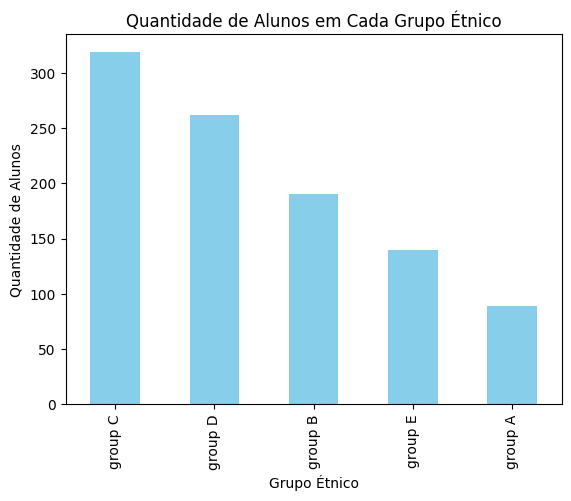

In [10]:
# Criando um gráfico de barras
df['race/ethnicity'].value_counts().plot(kind='bar', color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Grupo Étnico')
plt.ylabel('Quantidade de Alunos')
plt.title('Quantidade de Alunos em Cada Grupo Étnico')

# Exibindo o gráfico
plt.show()

## 4.Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?


In [11]:
#Quantidade de aluno de cada gênero
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

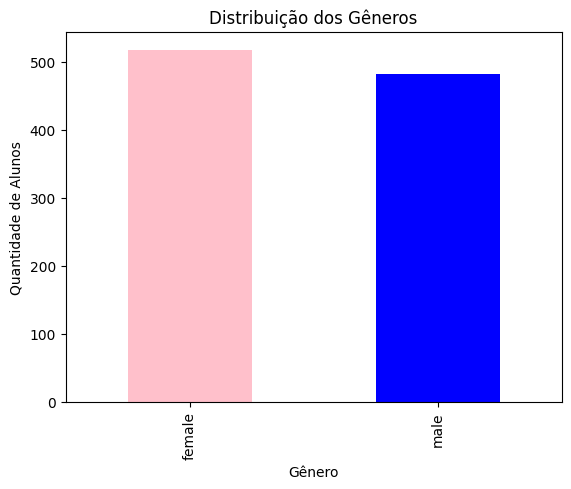

In [12]:

# Criando um gráfico de barras
df['gender'].value_counts().plot(kind='bar', color=['pink','blue'])

# Adicionando rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Alunos')
plt.title('Distribuição dos Gêneros')

# Exibindo o gráfico
plt.show()

In [13]:
df['gender'].value_counts() / df['gender'].count() *100

female    51.8
male      48.2
Name: gender, dtype: float64

In [14]:
print ('51,8% dos estudantes são do gênero feminino e 48,2% do gênero masculino' )

51,8% dos estudantes são do gênero feminino e 48,2% do gênero masculino


## 5.Analise as notas de matemática dos alunos de forma mais completa possível.

In [15]:
# Função que incrementa a função describe
# Amplitude (amp): Diferença entre o valor máximo e mínimo, proporcionando insights sobre a dispersão dos dados.
# Coeficiente de Variação (CV): Mede a variabilidade relativa em relação à média, ou seja, a dispersão em termos percentuais.
# Assimetria (skewness): Medida estatística para avaliar a assimetria da distribuição dos dados

def describe_new(df):
    df1 = df.describe()
    df1.loc['amplitude'] = df1.loc['max'] - df1.loc['min']
    df1.loc['variancia'] = df1.loc['std']*df1.loc['std']
    df1.loc['Assimetria'] = df1.skew() # quando positiva, assimetria a esquerda. quando negativa, assimetria a direita
    return df1

In [34]:
#describe para as notas de matemática.

describe_new(df['math score'])

count         1000.000000
mean            66.089000
std             15.163080
min              0.000000
25%             57.000000
50%             66.000000
75%             77.000000
max            100.000000
amplitude      100.000000
variancia      229.918998
Assimetria       2.921313
Name: math score, dtype: float64

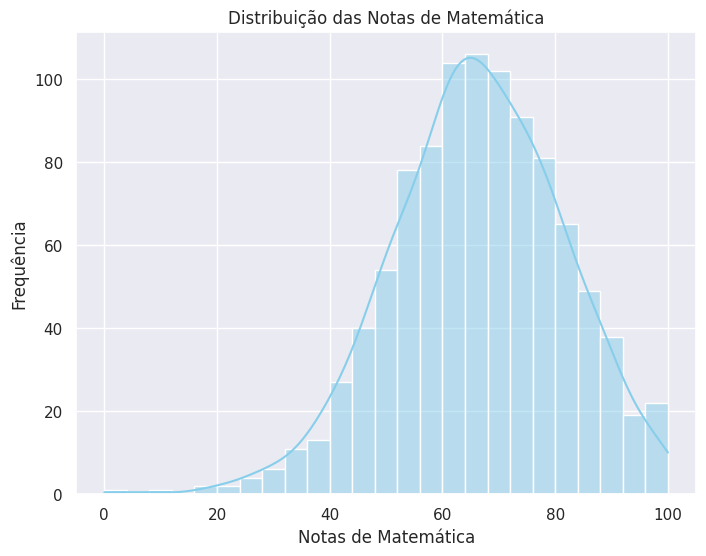

In [23]:
#Histograma

plt.figure(figsize=(8, 6))
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribuição das Notas de Matemática')
plt.xlabel('Notas de Matemática')
plt.ylabel('Frequência')
plt.show()



In [ ]:
A análise feita através do describe e do histograma mostra uma assimetria negativa das notas de matemática.

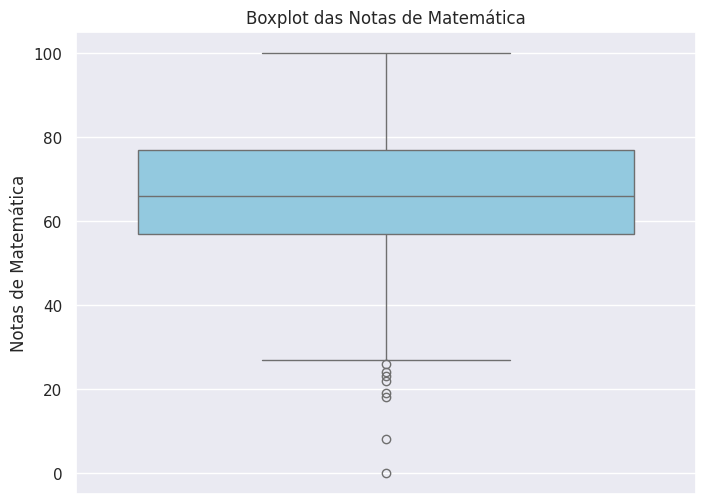

In [24]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='math score', color='skyblue')
plt.title('Boxplot das Notas de Matemática')
plt.ylabel('Notas de Matemática')
plt.show()

 IQR é  20.0
O numero de outliers em math score foi de:  8


<Figure size 1000x600 with 0 Axes>

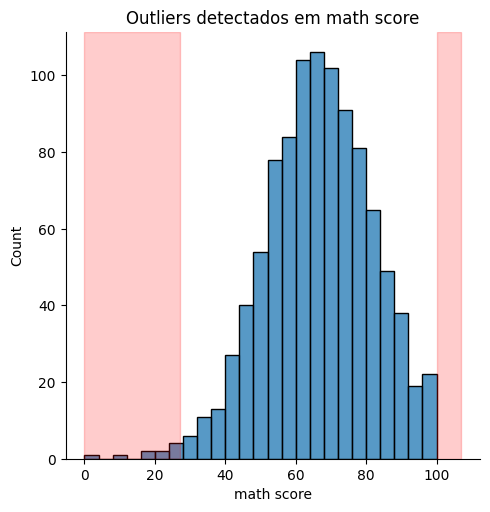

In [40]:
# procurando entender os outliers


columns_to_plot = ['math score']

def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('O numero de outliers em {} foi de: '.format(colname), len(outliers))
    return lower, upper, outliers


for column in columns_to_plot:
  lower, upper, out =  find_outlier_iqr(df, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(df[column], kde=False)
    plt.axvspan(xmin = lower,xmax= df[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

Verificar os outliers

Qual a nota média de matemática dos alunos segundo o grau de
escolaridade dos pais?

In [26]:
# calcular a média das notas de memória média de matemática dos alunos segundo o grau de escolaridade dos pais

df.groupby('parental level of education')['math score'].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

### 7. Faça a mesma análise para as notas de leitura e escrita.


In [20]:
#describe para as notas de matemática.

#describe para as notas de matemática.reading score	writing score


describe_new(df[['reading score', 'writing score']])

,reading score,writing score
count,1000.000000,1000.000000
mean,69.169000,68.054000
std,14.600192,15.195657
min,17.000000,10.000000
25%,59.000000,57.750000
50%,70.000000,69.000000
75%,79.000000,79.000000
max,100.000000,100.000000
amplitude,83.000000,90.000000
variancia,213.165605,230.907992


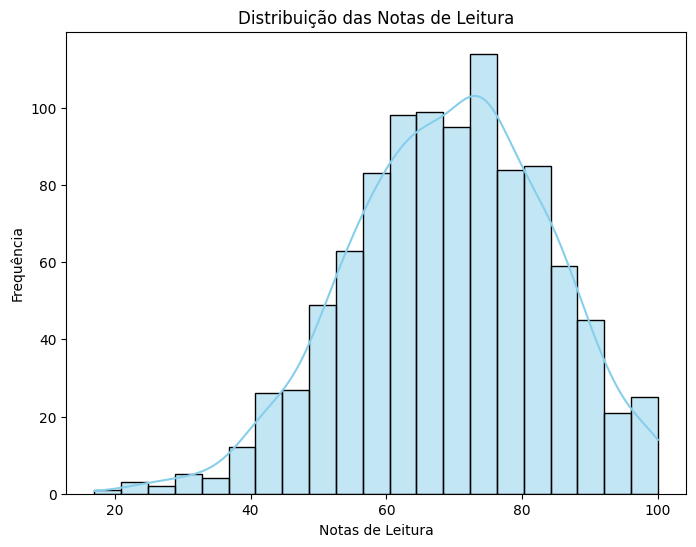

In [21]:
#Histograma

plt.figure(figsize=(8, 6))
sns.histplot(df['reading score'], kde=True, color='skyblue')
plt.title('Distribuição das Notas de Leitura')
plt.xlabel('Notas de Leitura')
plt.ylabel('Frequência')
plt.show()


A análise feita através do describe e do histograma mostra uma assimetria negativa das notas de matemática.

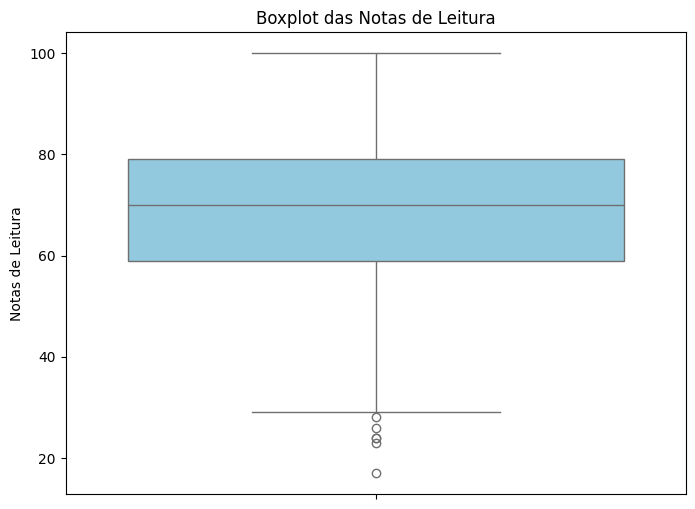

In [25]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='reading score', color='skyblue')
plt.title('Boxplot das Notas de Leitura')
plt.ylabel('Notas de Leitura')
plt.show()

 IQR é  20.0
O numero de outliers em reading score foi de:  6


<Figure size 1000x600 with 0 Axes>

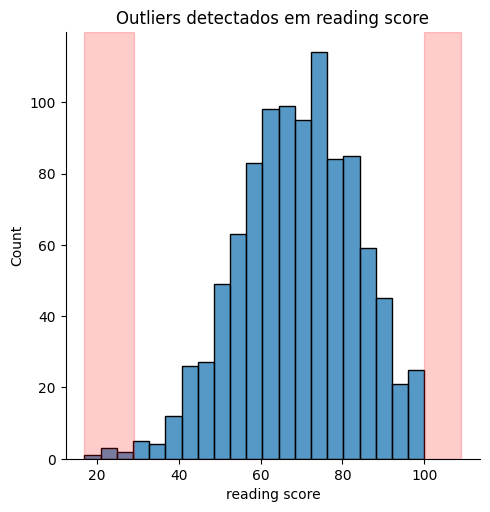

In [41]:
# procurando entender os outliers de reading score


columns_to_plot = ['reading score']

for column in columns_to_plot:
  lower, upper, out =  find_outlier_iqr(df, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(df[column], kde=False)
    plt.axvspan(xmin = lower,xmax= df[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

In [38]:
# calcular a média das notas de memória média de escrita dos alunos segundo o grau de escolaridade dos pais

df.groupby('parental level of education')['reading score'].mean()

parental level of education
associate's degree    70.927928
bachelor's degree     73.000000
high school           64.704082
master's degree       75.372881
some college          69.460177
some high school      66.938547
Name: reading score, dtype: float64

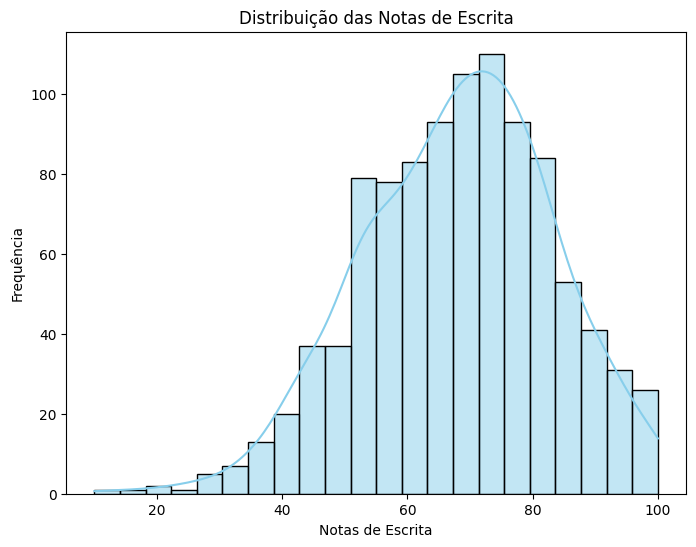

In [22]:
#Histograma

plt.figure(figsize=(8, 6))
sns.histplot(df['writing score'], kde=True, color='skyblue')
plt.title('Distribuição das Notas de Escrita')
plt.xlabel('Notas de Escrita')
plt.ylabel('Frequência')
plt.show()


In [ ]:
A análise feita através do describe e do histograma mostra uma assimetria negativa das notas de matemática.

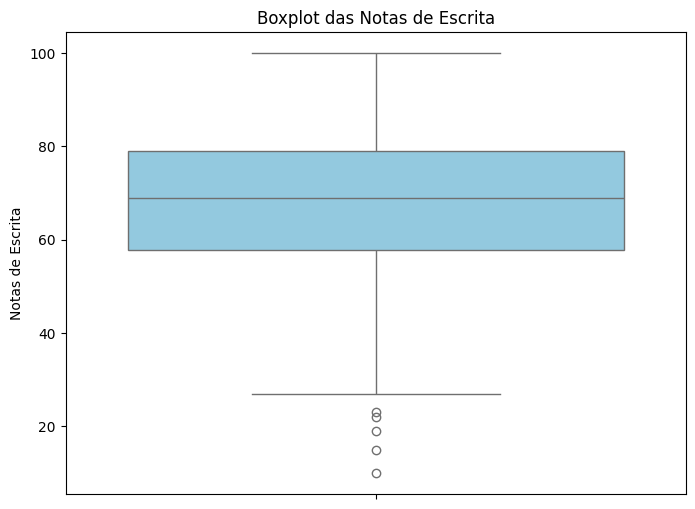

In [24]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='writing score', color='skyblue')
plt.title('Boxplot das Notas de Escrita')
plt.ylabel('Notas de Escrita')
plt.show()

In [37]:
# calcular a média das notas de memória média de escrita dos alunos segundo o grau de escolaridade dos pais

df.groupby('parental level of education')['writing score'].mean()

parental level of education
associate's degree    69.896396
bachelor's degree     73.381356
high school           62.448980
master's degree       75.677966
some college          68.840708
some high school      64.888268
Name: writing score, dtype: float64

 IQR é  21.25
O numero de outliers em writing score foi de:  5


<Figure size 1000x600 with 0 Axes>

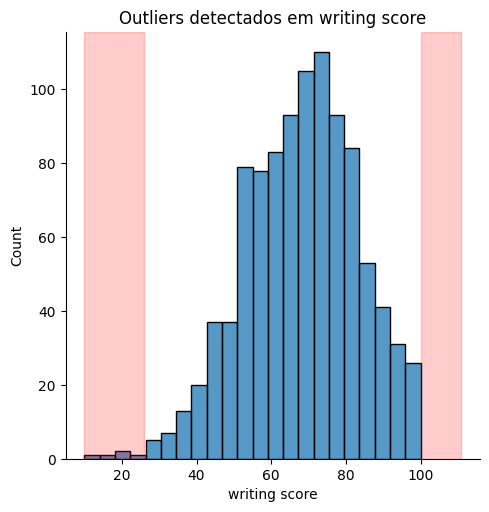

In [42]:
# procurando entender os outliers de writing score


columns_to_plot = ['writing score']

for column in columns_to_plot:
  lower, upper, out =  find_outlier_iqr(df, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(df[column], kde=False)
    plt.axvspan(xmin = lower,xmax= df[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

### 8. Verifique gráficamente a relação da nota de leitura e de escrita.

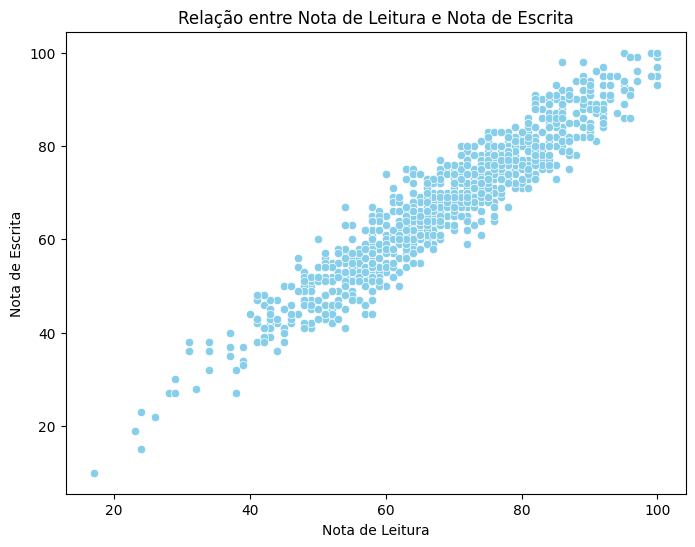

In [26]:
# Gráfico de dispersão das notas de leitura e escrita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reading score', y='writing score', data=df, color='skyblue')
plt.title('Relação entre Nota de Leitura e Nota de Escrita')
plt.xlabel('Nota de Leitura')
plt.ylabel('Nota de Escrita')
plt.show()

Os pontos no gráfico mostram uma tendência de crescimento a direita, sugerindo uma caracterização de correlação positiva entre a leitura e escrita. Quanto maior a nota de leitura, maior a nota de escrita e vice versa.



### Atividade extra:
### 9. Analise mais algum dado que seja interessante avaliar e represente graficamente, através de boxplot, histogramas, barplot dentre outros diversos de livre escolha.

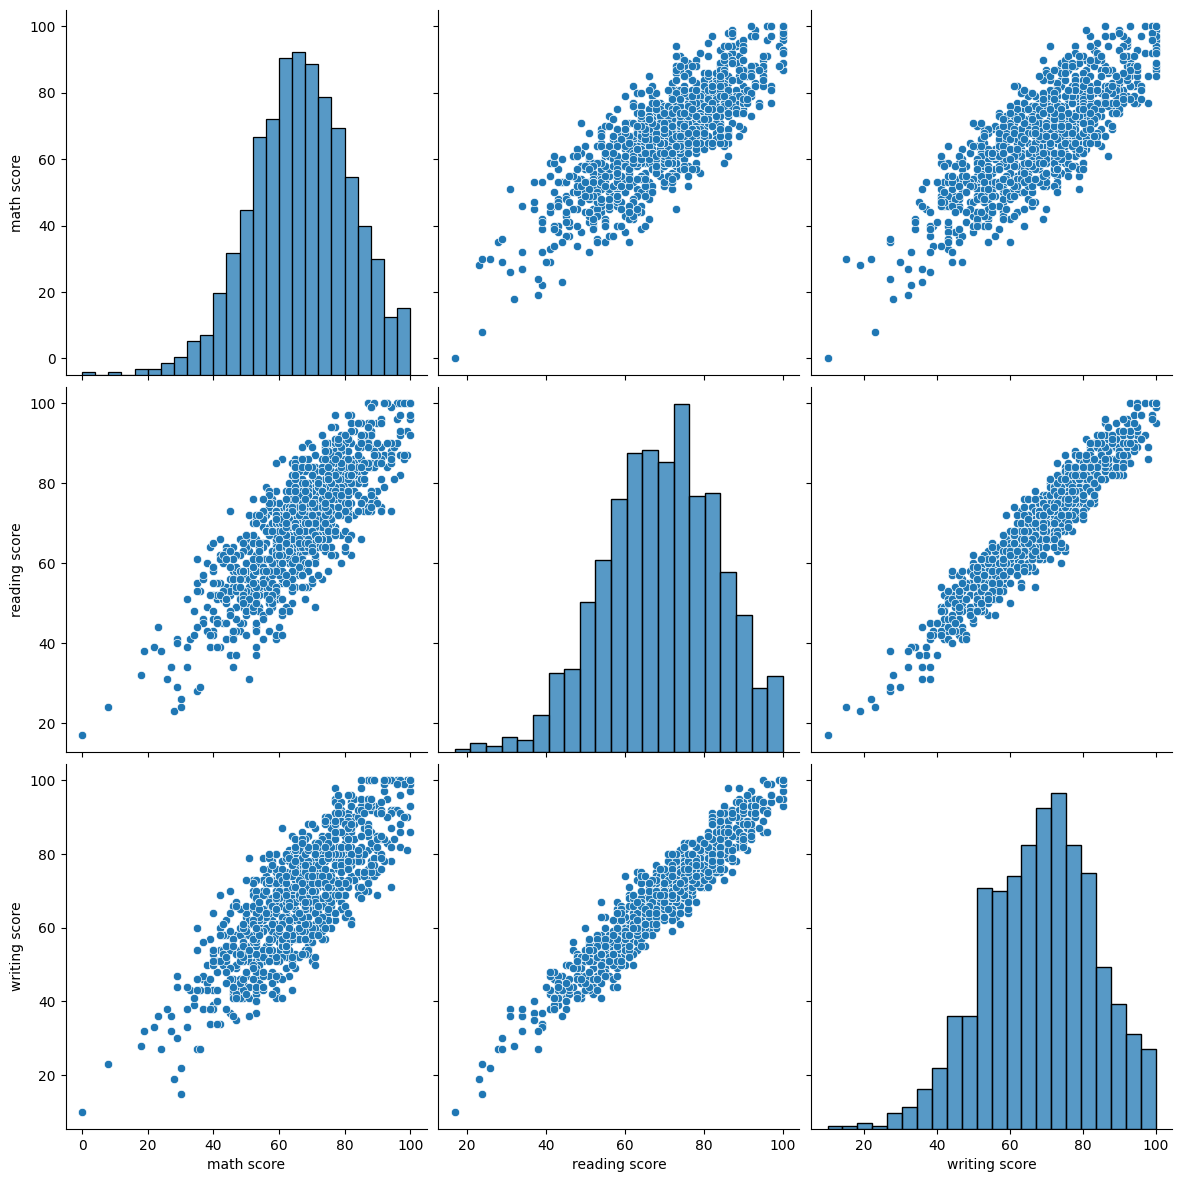

In [44]:
sns.pairplot(df[['math score', 'reading score', 'writing score']], height=4)


O gráfico paiplot permite ver a relação entre as variáveis através dos gráficos de disperssão. O que podemos ver é uma força da relação maior entre leitura e escrita do que seus respectivos pares quando relacionados a matemática, que apresenta uma disperssão maior.  

<ipython-input-45-c60a1a28165a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="parental level of education", y="average", data=df_sorted, palette="Set2")


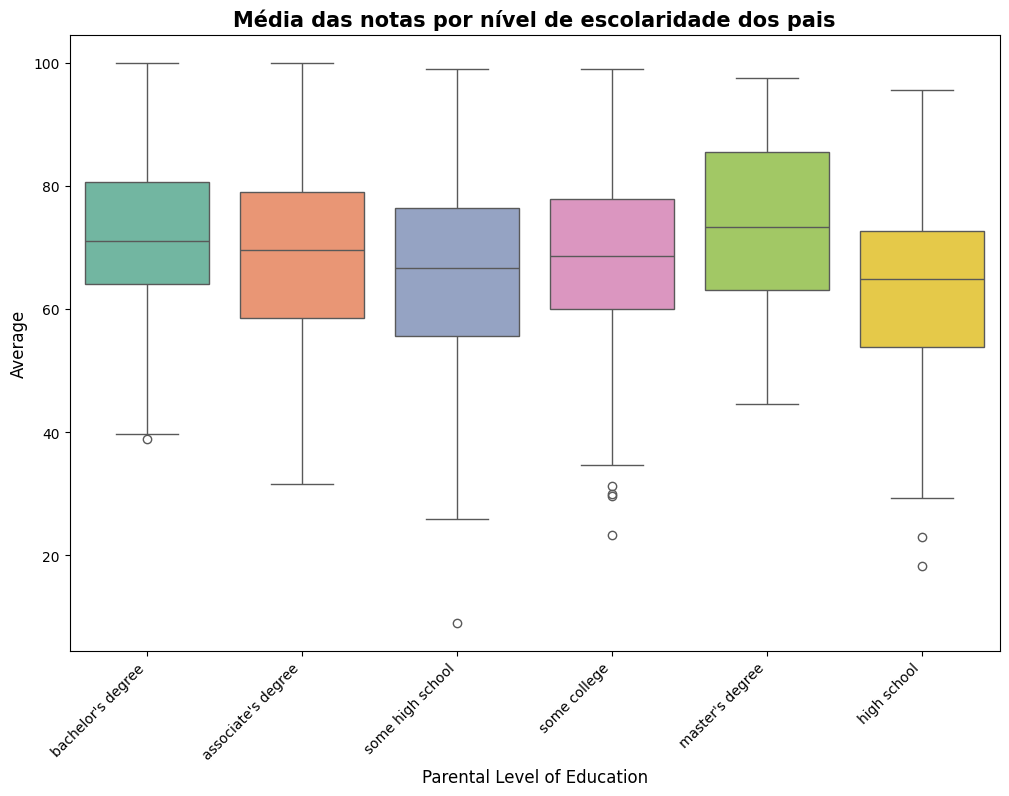

In [45]:
df_sorted = df.sort_values(by='average', ascending=False)

#plt.style.use('dark_background')
#sns.set_palette("Set2")

plt.figure(figsize=(12, 8))

sns.boxplot(x="parental level of education", y="average", data=df_sorted, palette="Set2")

plt.title('Média das notas por nível de escolaridade dos pais', fontsize=15, fontweight='bold')
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Average', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()

Os boxplots acima relaciona a média geral com o nível de escolaridade dos pais. Ele mostra um deslocamento para cima do atributo média quando o nível escolar dos pais é maior (nível superior e mestrado).